## (1) Geometric Translation
Geometric image translation is a fundamental operation in computer vision, involving shifting an image in the spatial domain without altering its content. This transformation is mathematically represented as a displacement of pixel coordinates. It is widely used in image processing, robotics, and computer vision applications such as object tracking, image registration, and augmented reality.

### Mathemetical Representation
Image translation can be expressed as a function that maps pixel coordinates from one location to another. Given an image function $I(x, y)$, a translation by $(t_x, t_y)$ can be defined as:
##### Equation
I'(x, y) = I(x - t_x, y - t_y)

where:

    $I(x, y)$ is the original image,
    $I'(x, y)$ is the translated image,
    $t_x$ and $t_y$ are the translation distances along the x-axis and y-axis, respectively.

### Homogeneous Coordinates Representation

In matrix notation, translation can be expressed using homogeneous coordinates. The transformation matrix for 2D translation is:
\begin{equation}
T = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1 \end{bmatrix}
\end{equation}
A point $(x, y)$ in homogeneous coordinates is represented as $P = [x, y, 1]^T$, and the translated point $P'$ is obtained by:
\begin{equation}
P' = T P = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ 1 \end{bmatrix} = \begin{bmatrix} x + t_x \\ y + t_y \\ 1 \end{bmatrix}
\end{equation}

### Example Calculation

Suppose we have an image with a pixel at $(5, 3)$, and we want to translate it by $(t_x, t_y) = (2, -4)$. The new coordinates will be:
\begin{equation}
\begin{bmatrix} 5 + 2 \\ 3 - 4 \end{bmatrix} = \begin{bmatrix} 7 \\ -1 \end{bmatrix}
\end{equation}
This means the pixel previously at $(5, 3)$ now appears at $(7, -1)$ in the translated image.



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('IMG_9422.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(-0.5, 5615.5, 3743.5, -0.5)

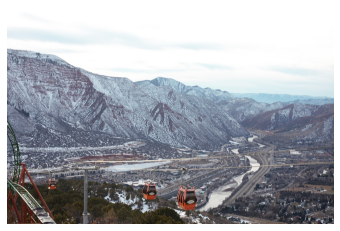

In [3]:
plt.imshow(image)
plt.axis('off')

In [4]:
tx, ty = 100,300 #shift 50 pixels in x direction and 30 pixels in y direction
translation_matrix = np.float32([[1,0,tx],[0,1,ty]]) #translation matrix for shifting image by tx and ty pixels
translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0])) #applying translation matrix to image using warpAffine function of opencv library

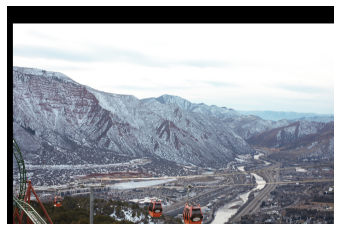

In [5]:
#plt.subplot(1,2,1)
plt.imshow(translated_image)
plt.axis('off')
plt.show()

* The image is shifted without distortion.

* Parts of the image may move out of bounds, creating black regions.

* Using a transformation matrix simplifies translation operations.

## (2) Rotation

Rotation moves the image around a fixed point (usually the center).

### Mathematical Representation

The mathematical representation of a 2D rotation around the origin by an angle \theta is:

\begin{equation}
\begin{bmatrix} x' \\ y' \end{bmatrix} =
\begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix}
\end{equation}

where:

- \( (x, y) \) are the original coordinates,
- \( (x', y') \) are the new coordinates after rotation,
- \( \theta \) is the angle of rotation (in radians).


In [6]:
import cv2
import numpy as np  
import matplotlib.pyplot as plt

(-0.5, 5615.5, 3743.5, -0.5)

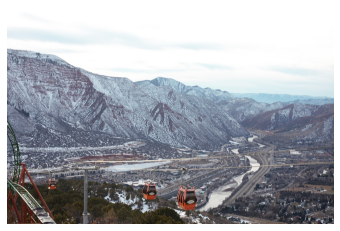

In [7]:
image = cv2.imread('IMG_9422.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')

In [14]:
(h,w)= image.shape[:2]
center = (w//2,h//2)
angle = 45
scale = 0.5
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale) #rotation matrix for rotating image by 45 degrees
rotated_image = cv2.warpAffine(image, rotation_matrix, (w,h)) #applying rotation matrix to image using warpAffine function of opencv library

(-0.5, 5615.5, 3743.5, -0.5)

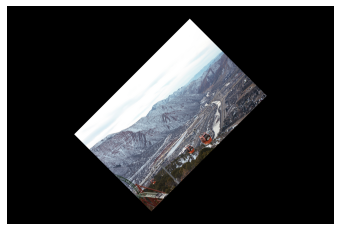

In [15]:
plt.imshow(rotated_image)
plt.axis('off')

## (3) Aspect Ratio Change

Aspect ratio determines the proportion of width to height.

(-0.5, 199.5, 199.5, -0.5)

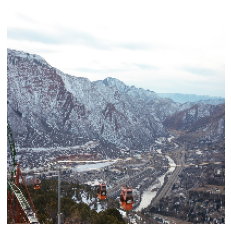

In [16]:
new_widht = 200
new_height = 200
resized_image = cv2.resize(image, (new_widht, new_height)) #resizing image to 200x200 pixels    
plt.imshow(resized_image)
plt.axis('off')

## (3) Affine Transformation

Affine transformations preserve parallelism but can apply rotation, scaling, and shearing.

### Mathematical Representation

The mathematical representation of a 2D affine transformation is:
\begin{equation}
\begin{bmatrix} x' \\ y' \end{bmatrix} =
\begin{bmatrix} a & b \\ c & d \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix} +
\begin{bmatrix} e \\ f \end{bmatrix}
\end{equation}

where:

- **(x, y)** are the original coordinates,
- **(x', y')** are the new coordinates after transformation,
- **a, b, c, d** define the linear transformation (rotation, scaling, shear, etc.),
- **e, f** define the translation.

This equation represents a general affine transformation where a combination of rotation, scaling, shearing, and translation can be applied.
